Run this in a terminal to make sure the shared folder is mounted (only at the beginning when booting up the VM.)

    sudo mount -t vboxsf -o uid=$UID,gid=$(id -g) simulation_results ~/Documents/sf_simulation_results/

In [2]:
%%bash
cd ../chaste_build/
make CartilageSheetSimulation

[  5%] Built target timekeeper
[ 11%] Built target chaste_global
[ 11%] Built target chaste_linalg
[ 16%] Built target chaste_io
[ 27%] Built target chaste_ode
[ 44%] Built target chaste_mesh
[ 44%] Built target chaste_pde
[ 88%] Built target chaste_cell_based
Scanning dependencies of target chaste_project_cartilage
[ 88%] Building CXX object projects/cartilage/CMakeFiles/chaste_project_cartilage.dir/src/NodeBasedCartilageSheet.cpp.o
[ 94%] Building CXX object projects/cartilage/CMakeFiles/chaste_project_cartilage.dir/src/NodeBasedMesenchymalCondensation.cpp.o
[ 94%] Building CXX object projects/cartilage/CMakeFiles/chaste_project_cartilage.dir/src/cell/cycle/CellTissueTypeBasedCellCycleModel.cpp.o
[ 94%] Building CXX object projects/cartilage/CMakeFiles/chaste_project_cartilage.dir/src/cell/cycle/ChondrocytesOnlyCellCycleModel.cpp.o
[ 94%] Linking CXX shared library libchaste_project_cartilage.so
[100%] Built target chaste_project_cartilage
Scanning dependencies of target CartilageShe

In [3]:
import sys
sys.path.append('analysis')

import numpy as np
import time 
import matplotlib.pyplot as plt
import distribute_executable as de
import sheet_metrics as sm

plt.style.use('seaborn-whitegrid')
#plt.style.use('tableau-colorblind10')
params = {'legend.fontsize': 'xx-large',
          'figure.figsize': (6.75, 5),
          'lines.linewidth': 3.0,
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large',
         'font.size': 12}
plt.rcParams.update(params)

# Let's try and see
We set
- lower and upper rigid boundaries
- lower and upper perichondrial layer
- chondrocyte layers in between, nicely stacked at cartesian coordinates, filling the space between the rigid boundaries
- repulsion only
- oriented cell division
- clonal patch size maximum to 6 cells 

## First without scaling

Data archive: 
- 6 random seeds (0--5), patch size limit of 6 cells:
      nice -n 19 /home/kubuntu1804/Documents/chaste_build/projects/cartilage/apps/CartilageSheetSimulation --output-dir exp-intercalation/20200331-173524/ --S 0 --sbt --T 80.0 --sw 8 --sd 8 --sh 6 --pu 1 --pl 1 --nb 2 --mu 0.0 --A 0.25 --F pwq --mu_R 80.0 --p 0.1 --u 5.0 --cg 

## With scaling

- 6 random seeds (0--5):
        nice -n 19 /home/kubuntu1804/Documents/chaste_build/projects/cartilage/apps/CartilageSheetSimulation --output-dir exp-intercalation/20200416-093848/ --S 0 --sbt --T 80.0 --sw 8 --sd 8 --sh 6 --pu 1 --pl 1 --nb 2 --mu 0.0 --A 0.25 --F pwq --mu_R 80.0 --p 0.1 --psl 4 --u 3.5 --cg  --sc 1.25
    

Text(0,0.5,'Average patch projection area')

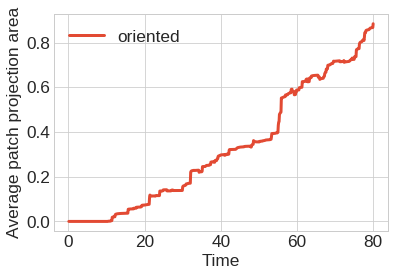

In [8]:
dir_directed = 'exp-intercalation/20200416-093848/'

# time steps are consistent across runs, so it's sufficient to load them from a single path
times_d, coords_d = sm.read_in_data('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_directed + '0/results_from_time_0/') 

ppa_av_d = np.zeros(times_d.shape)
for seed in range(6):
    ppa_av_d = ppa_av_d + np.loadtxt('/home/kubuntu1804/Documents/sf_simulation_results/'+dir_directed+str(seed)+'/results_from_time_0/metrics_results/data_patch_projection_area_av.txt', dtype=float)
ppa_av_d = ppa_av_d /6


plt.plot(times_d, ppa_av_d, label='oriented')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Average patch projection area')

In [4]:
output_directory = 'exp-intercalation/' + time.strftime("%Y%m%d-%H%M%S") +'/'
flags = ' --sbt' # synchronized birth times
flags = flags + ' --T 80.0' # final time 80h
flags = flags + ' --sw 8' # 10 cells in x direction
flags = flags + ' --sd 8' # 20 cells in y direction
flags = flags + ' --sh 4' # 6 cells in z direction
flags = flags + ' --pu 1' # 1 layer perichondrial cells above
flags = flags + ' --pl 1' # 1 layer perichondrial cells below
flags = flags + ' --nb 2' # both an upper and a lower rigid boundary
flags = flags + ' --mu 0.0' # adhesive spring stiffness set to 0 -> repulsion only
flags = flags + ' --A 0.25' # 25% of stem cells activated
flags = flags + ' --F pwq' # PWQ force
flags = flags + ' --mu_R 80.0' # set repulsive spring stiffness to 80.0
flags = flags + ' --p 0.1' # set perturbation to 0.1
flags = flags + ' --psl 4'
flags = flags + ' --u 3.5' # set distance between boundaries to 3.5
flags = flags + ' --cg ' # use a Cartesian grid for initial placement
flags = flags + ' --sc 1.25' # scale initial sheet to generate more space


#flags = flags + ' --rdd' #random division directions

executable='/home/kubuntu1804/Documents/chaste_build/projects/cartilage/apps/CartilageSheetSimulation'

In [5]:
de.run_simulations_multiple_random_seeds(output_directory, flags=flags, number_of_simulations=6, executable=executable)

nice -n 19 /home/kubuntu1804/Documents/chaste_build/projects/cartilage/apps/CartilageSheetSimulation --output-dir exp-intercalation/20200416-093848/ --S 0 --sbt --T 80.0 --sw 8 --sd 8 --sh 6 --pu 1 --pl 1 --nb 2 --mu 0.0 --A 0.25 --F pwq --mu_R 80.0 --p 0.1 --psl 4 --u 3.5 --cg  --sc 1.25
nice -n 19 /home/kubuntu1804/Documents/chaste_build/projects/cartilage/apps/CartilageSheetSimulation --output-dir exp-intercalation/20200416-093848/ --S 1 --sbt --T 80.0 --sw 8 --sd 8 --sh 6 --pu 1 --pl 1 --nb 2 --mu 0.0 --A 0.25 --F pwq --mu_R 80.0 --p 0.1 --psl 4 --u 3.5 --cg  --sc 1.25
nice -n 19 /home/kubuntu1804/Documents/chaste_build/projects/cartilage/apps/CartilageSheetSimulation --output-dir exp-intercalation/20200416-093848/ --S 2 --sbt --T 80.0 --sw 8 --sd 8 --sh 6 --pu 1 --pl 1 --nb 2 --mu 0.0 --A 0.25 --F pwq --mu_R 80.0 --p 0.1 --psl 4 --u 3.5 --cg  --sc 1.25
nice -n 19 /home/kubuntu1804/Documents/chaste_build/projects/cartilage/apps/CartilageSheetSimulation --output-dir exp-intercalatio

In [6]:
de.run_postprocessing_multiple_random_seeds(6, output_directory)

['/home/kubuntu1804/Documents/sf_simulation_results/exp-intercalation/20200416-093848/0/results_from_time_0/', '/home/kubuntu1804/Documents/sf_simulation_results/exp-intercalation/20200416-093848/1/results_from_time_0/', '/home/kubuntu1804/Documents/sf_simulation_results/exp-intercalation/20200416-093848/2/results_from_time_0/', '/home/kubuntu1804/Documents/sf_simulation_results/exp-intercalation/20200416-093848/3/results_from_time_0/', '/home/kubuntu1804/Documents/sf_simulation_results/exp-intercalation/20200416-093848/4/results_from_time_0/', '/home/kubuntu1804/Documents/sf_simulation_results/exp-intercalation/20200416-093848/5/results_from_time_0/']
Starting postprocessing with 2 processes


analysis/sheet_metrics.py:104: RuntimeWarning: All-NaN slice encountered
  width[:, 0] = abs(np.nanmax(coordinates[:,0::3], axis=1)- np.nanmin(coordinates[:,0::3], axis=1))
analysis/sheet_metrics.py:104: RuntimeWarning: All-NaN slice encountered
  width[:, 0] = abs(np.nanmax(coordinates[:,0::3], axis=1)- np.nanmin(coordinates[:,0::3], axis=1))
analysis/sheet_metrics.py:104: RuntimeWarning: All-NaN axis encountered
  width[:, 0] = abs(np.nanmax(coordinates[:,0::3], axis=1)- np.nanmin(coordinates[:,0::3], axis=1))
analysis/sheet_metrics.py:105: RuntimeWarning: All-NaN slice encountered
  width[:, 1] = abs(np.nanmax(coordinates[:,1::3], axis=1)- np.nanmin(coordinates[:,1::3], axis=1))
analysis/sheet_metrics.py:104: RuntimeWarning: All-NaN axis encountered
  width[:, 0] = abs(np.nanmax(coordinates[:,0::3], axis=1)- np.nanmin(coordinates[:,0::3], axis=1))
analysis/sheet_metrics.py:105: RuntimeWarning: All-NaN axis encountered
  width[:, 1] = abs(np.nanmax(coordinates[:,1::3], axis=1)- np.na

[             nan   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00

   1.83768700e-01]


analysis/evaluate_cartilage_sheet.py:235: RuntimeWarning: Mean of empty slice
  ppa_mean = np.nanmean(ppa, axis=0)
/usr/lib/python3/dist-packages/numpy/lib/nanfunctions.py:1427: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


[ nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  

analysis/evaluate_cartilage_sheet.py:235: RuntimeWarning: Mean of empty slice
  ppa_mean = np.nanmean(ppa, axis=0)
/usr/lib/python3/dist-packages/numpy/lib/nanfunctions.py:1427: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


[             nan   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00

   1.96501830e-01]
[             nan   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+

   1.35071462e+00]
[        nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan        

  0.01425557  0.01425403  0.01425238  0.01425073]
[ nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  n